# DESAFIO - Aula_18 - Cross-validation

Base de Dados <br>
Fonte da dados: kaglgle <br>
Link: https://www.kaggle.com/mashimo/features-selection-for-multiple-linear-regression/data <br>
- Objetivo: prever o Rating do cliente usando: Renda(Income), Limite(Limit), Número de cartões(Card), Idade(Age), Educação(Education), Sexo(Gender), se o cliente é estudante (Student), se o cliente é casado (Married) e o saldo em cc(Balance)

Ajustar um modelos de regresão linear multipla
Usar um método de validação cruzada para validar o modelo


In [2]:
# carregando as librarys e sub-librarys
import pandas as pd #to load the data file as a Pandas data frame and analyze the data.
import numpy as np
from sklearn import datasets, linear_model #datasets-load a sample dataset linear_model-run a linear regression
from sklearn.model_selection import train_test_split #split to training and test sets
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import matplotlib
import statsmodels.api as sm
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

C:\Users\tati\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Carrega base de dados Rating

In [3]:
credit = pd.read_csv("C:/Users/tati/Documents/dsc_fev2018/18-cross-validation-regularization/data/Credit_1.csv")
credit.columns

Index(['Unnamed: 0', 'Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education',
       'Gender', 'Student', 'Married', 'Ethnicity', 'Balance'],
      dtype='object')

## Parte_1: Dividindo a Base em treinamento e teste

Podemos usar a função train_test_split para fazer a divisão. <br>
O test_size = 0.2 dentro da função indica a porcentagem dos dados que devem ser mantidos para testes. <br>
Geralmente é cerca de 80/20 ou 70/30.

In [4]:
# dropando algumas variáveis
y = credit['Rating']
df = credit.drop('Rating', axis=1)
df = df.drop('Ethnicity', axis=1)
df = df.drop('Unnamed: 0', axis=1)

In [5]:
# mudando o conteudo das variáveis binárias para 0 e 1
def native(Student):
    if Student in ["Yes"]:
        return 0
    else: 
        return 1 
#
def native1(Gender):
    if Gender in ["Male"]:
        return 0
    else: 
        return 1 
#
def native2(Married):
    if Married in ["Yes"]:
        return 0
    else: 
        return 1 

In [6]:
df['Student'] = df['Student'].apply(native)
df['Gender'] = df['Gender'].apply(native1)
df['Married'] = df['Married'].apply(native2)

In [7]:
df.head()

,Income,Limit,Cards,Age,Education,Gender,Student,Married,Balance
0,14.891,3606,2,34,11,1,1,0,333
1,106.025,6645,3,82,15,1,0,0,903
2,104.593,7075,4,71,11,1,1,1,580
3,148.924,9504,3,36,11,1,1,1,964
4,55.882,4897,2,68,16,1,1,0,331


In [8]:
# criando as bases de treinamento e teste
# fixando a semente para não alterar a amostra a cad vez que for rodar o programa
X_train,  X_test, y_train,  y_test =  train_test_split(df, y,test_size = 0.3,  random_state=144)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(280, 9) (280,)
(120, 9) (120,)


## Parte_2: Ajustando um modelo linear na base de treinamento

In [9]:
X_train.head()

,Income,Limit,Cards,Age,Education,Gender,Student,Married,Balance
372,19.782,3782,2,46,16,1,0,1,840
125,27.578,2531,1,34,15,1,1,0,0
55,32.916,1786,2,60,8,1,1,0,0
224,121.709,7818,4,50,6,1,1,0,701
18,49.570,6384,1,28,9,1,1,0,891


In [10]:
# Ajustando o modelo
lm = linear_model.LinearRegression()
model = lm.fit(X_train,  y_train)

# Obtendo as predições do modelo ajustado
p_train = lm.predict(X_train)
p_test = lm.predict(X_test)

print(model.coef_)

[  1.27735285e-01   6.33252062e-02   4.75638523e+00  -1.12115440e-02
  -3.30614713e-01   1.57651669e-14  -9.96948338e-01  -3.17459094e+00
   1.15611773e-02]




 ---Base de Train---


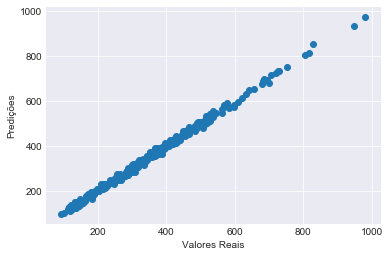



 ---Base de Test---


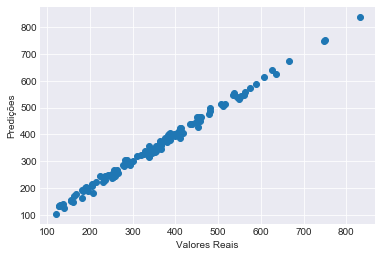

In [11]:
## Plotando o modelo ajustado
print ("\n\n ---Base de Train---")
plt.scatter(y_train, p_train) # real versus previsto train
plt.xlabel("Valores Reais")
plt.ylabel("Predições")
plt.show()
print ("\n\n ---Base de Test---")
plt.scatter(y_test, p_test) # real versus previsto test
plt.xlabel("Valores Reais")
plt.ylabel("Predições")
plt.show()

In [12]:
# R^2 do modelo
print ("R^2 train:", model.score(X_train, y_train))
print ("R^2 test:", model.score(X_test, y_test))

R^2 train: 0.996137070758
R^2 test: 0.99459584578


## Parte_3: Cross Validation

### k-fold 

KFold divide as amostras em k grupos de amostras, chamadas dobras, de tamanhos iguais (se possível). <br>
A função de predição é aprendida usando k-1 dobras e a dobra que resta é usada para teste.

In [15]:
# Necessary imports: 
#from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold

In [19]:
# Perform 5-fold cross validation'
scores1 = cross_val_score(model, df, y, cv=5)
print ("Cross-validated 5-fold scores: ", scores1)
print("Average 5-Fold CV Score: {}".format(np.mean(scores1)))

Cross-validated 5-fold scores:  [ 0.99597615  0.99470027  0.99429748  0.99541293  0.99686465]
Average 5-Fold CV Score: 0.9954502955858768


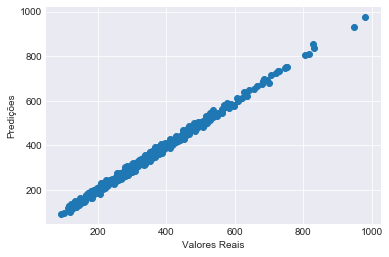

In [20]:
# Make cross validated predictions
predictions1 = cross_val_predict(model, df, y, cv=5)
plt.scatter(y, predictions1)
plt.xlabel("Valores Reais")
plt.ylabel("Predições")
plt.show()

In [21]:
accuracy1 = metrics.r2_score(y, predictions1)
print ("Cross-Predicted 5-fold  R^2:", accuracy1)

Cross-Predicted 5-fold  R^2: 0.995596391397


## Parte_4: Curva de aprendizado

In [22]:
print(__doc__)

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

Automatically created module for IPython interactive environment


In [ ]:
# plotando a curva de aprendizado usando o metodo de validação cruzada ShuffleSplit
ss = plot_learning_curve(n_splits=_________, test_size=__________, random_state=__________)
lm = linear_model.______________()
plot_learning_curve(lm, 'Curva de Aprendizagem', df, y, cv=_______, n_jobs=4)
plt.show()